In [1]:
from pyscenic.rss import regulon_specificity_scores

Regulon Specificity Scores --> RSS definition was introduced in 2018 here more information: https://www.sciencedirect.com/science/article/pii/S2211124718316346

In [2]:
from pyscenic.plotting import plot_rss
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pyscenic.binarization import binarize
import scanpy as sc
from adjustText import adjust_text
import re
import numpy as np
import matplotlib as mpl

In [3]:
def palplot(pal, names, colors=None, size=1):
    n = len(pal)
    f, ax = plt.subplots(1, 1, figsize=(n * size, size))
    ax.imshow(np.arange(n).reshape(1, n),
              cmap=mpl.colors.ListedColormap(list(pal)),
              interpolation="nearest", aspect="auto")
    ax.set_xticks(np.arange(n) - .5)
    ax.set_yticks([-.5, .5])
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    colors = n * ['k'] if colors is None else colors
    for idx, (name, color) in enumerate(zip(names, colors)):
        ax.text(0.0+idx, 0.0, name, color=color, horizontalalignment='center', verticalalignment='center')
    return f

### Split Dataframe in up and down module

In [4]:
adata_scenic = sc.read("/home/spuccio/isilon/spuccio/SP028_Autoimmunity/h5_files/CD4/CD4_res06_cariplo.h5ad")

In [29]:
?regulon_specificity_scores

Signature: regulon_specificity_scores(auc_mtx, cell_type_series)
Docstring:
Calculates the Regulon Specificty Scores (RSS). [doi: 10.1016/j.celrep.2018.10.045]

:param auc_mtx: The dataframe with the AUC values for all cells and regulons (n_cells x n_regulons).
:param cell_type_series: A pandas Series object with cell identifiers as index and cell type labels as values.
:return: A pandas dataframe with the RSS values (cell type x regulon).
File:      ~/miniconda3/lib/python3.7/site-packages/pyscenic/rss.py
Type:      function


In [5]:
auc_mtx = pd.read_csv("/home/spuccio/data/auc_mtx_CD4_imputed.csv",header=0,sep=",")

In [8]:
tmp1 = auc_mtx.set_index([adata_scenic.obs[['desc_0.6','TumorType']].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)])

In [10]:
del tmp1['Cell']

In [15]:
tmp1_pos =  tmp1.loc[:, tmp1.columns.str.contains(r'[+]', flags=re.IGNORECASE, regex=True)]
tmp1_neg = tmp1.loc[:, tmp1.columns.str.contains(r'[-]', flags=re.IGNORECASE, regex=True)]

# Regulon specificity scores (RSS) 

In [19]:
rss_cellType_tmp1_pos_c = regulon_specificity_scores( tmp1_pos, tmp1_pos.index)
rss_cellType_tmp1_neg_c = regulon_specificity_scores( tmp1_neg, tmp1_neg.index)

In [20]:
rss_cellType_tmp1_pos_c.T.dropna().to_csv("/home/spuccio/data/positive_regulons_cluster_disease.csv",sep="\t",header=True, index=True)
rss_cellType_tmp1_neg_c.T.dropna().to_csv("/home/spuccio/data/negative_regulons_cluster_disease.csv",sep="\t",header=True, index=True)

### RSS panel plot with all cell types (POSITIVE)

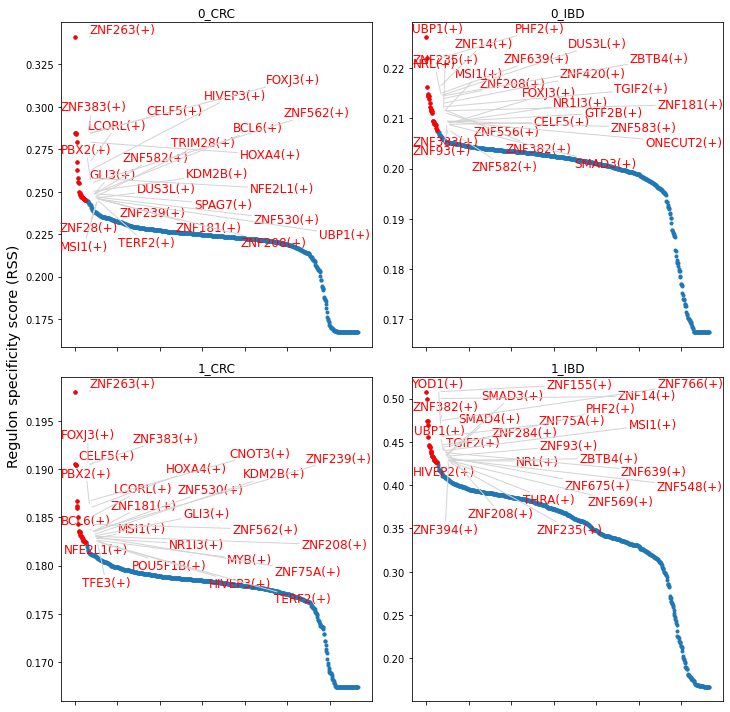

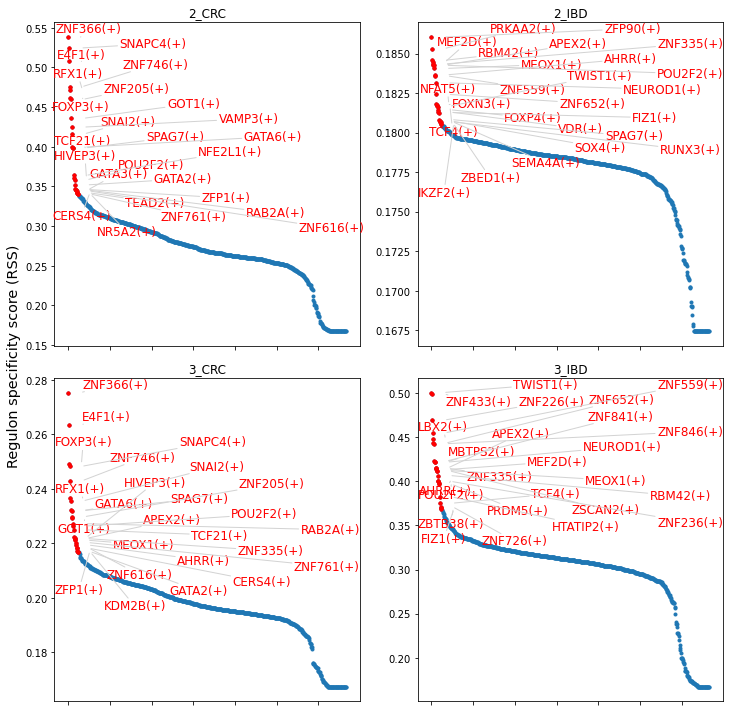

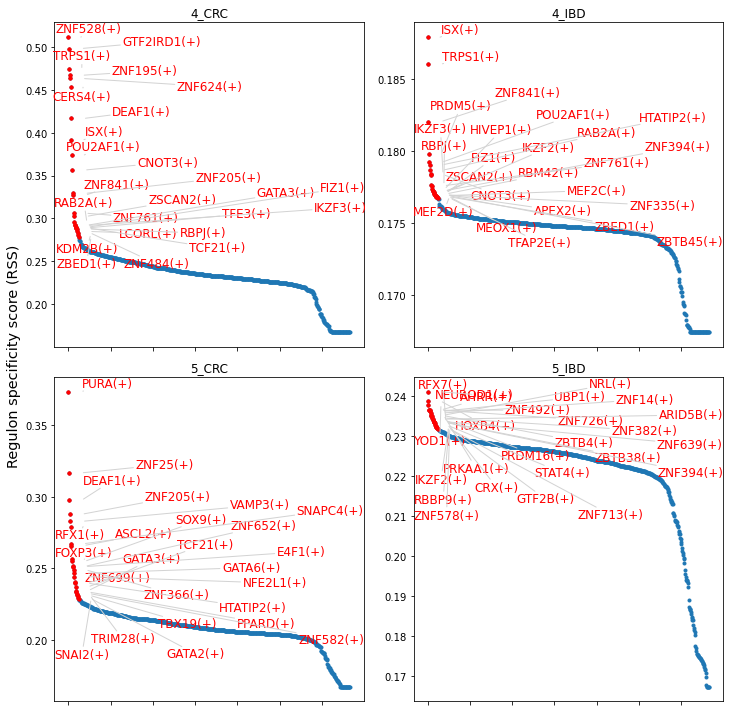

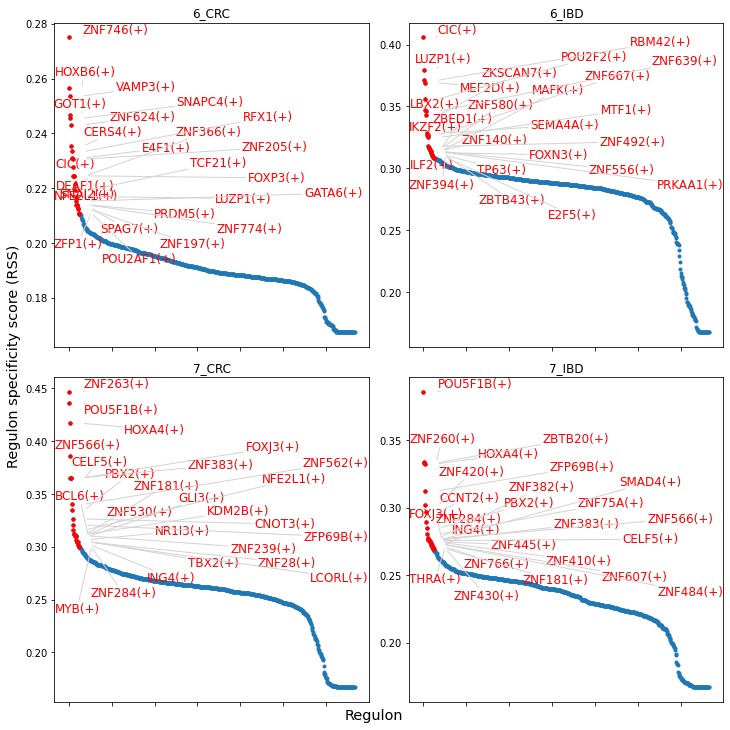

In [28]:
from adjustText import adjust_text
cats = sorted(list(set(rss_cellType_tmp1_pos_c.loc[(rss_cellType_tmp1_pos_c.index == "0_IBD") | (rss_cellType_tmp1_pos_c.index == "0_CRC") | (rss_cellType_tmp1_pos_c.index == "1_IBD") | (rss_cellType_tmp1_pos_c.index == "1_CRC")].index)))
fig = plt.figure(figsize=(10, 10))
for c,num in zip(cats, range(1,len(cats)+1)):
    x=rss_cellType_tmp1_pos_c.loc[(rss_cellType_tmp1_pos_c.index == "0_IBD") | (rss_cellType_tmp1_pos_c.index == "0_CRC") | (rss_cellType_tmp1_pos_c.index == "1_IBD") | (rss_cellType_tmp1_pos_c.index == "1_CRC")].T[c]
    ax = fig.add_subplot(2,2,num)
    plot_rss(rss_cellType_tmp1_pos_c.loc[(rss_cellType_tmp1_pos_c.index == "0_IBD") | (rss_cellType_tmp1_pos_c.index == "0_CRC") | (rss_cellType_tmp1_pos_c.index == "1_IBD") | (rss_cellType_tmp1_pos_c.index == "1_CRC")], c, top_n=25, max_n=None, ax=ax)
    ax.set_ylim( x.min()-(x.max()-x.min())*0.05 , x.max()+(x.max()-x.min())*0.05 )
    for t in ax.texts:
        t.set_fontsize(12)
    ax.set_ylabel('')
    ax.set_xlabel('')
    adjust_text(ax.texts, autoalign='xy', ha='right', va='bottom', arrowprops=dict(arrowstyle='-',color='lightgrey'), precision=0.001 )
 
#fig.text(0.5, 0.0, 'Regulon', ha='center', va='center', size='x-large')
fig.text(0.00, 0.5, 'Regulon specificity score (RSS)', ha='center', va='center', rotation='vertical', size='x-large')
plt.tight_layout()
plt.rcParams.update({
    'figure.autolayout': True,
        'figure.titlesize': 'large' ,
        'axes.labelsize': 'medium',
        'axes.titlesize':'large',
        'xtick.labelsize':'medium',
        'ytick.labelsize':'medium'
        })
plt.savefig("/home/spuccio/data/Imputed_cluster_positive/regulon_imputed_C0_1.pdf", dpi=600, bbox_inches = "tight")
plt.show()

from adjustText import adjust_text
cats = sorted(list(set(rss_cellType_tmp1_pos_c.loc[(rss_cellType_tmp1_pos_c.index == "2_IBD") | (rss_cellType_tmp1_pos_c.index == "2_CRC") | (rss_cellType_tmp1_pos_c.index == "3_IBD") | (rss_cellType_tmp1_pos_c.index == "3_CRC")].index)))
fig = plt.figure(figsize=(10, 10))
for c,num in zip(cats, range(1,len(cats)+1)):
    x=rss_cellType_tmp1_pos_c.loc[(rss_cellType_tmp1_pos_c.index == "2_IBD") | (rss_cellType_tmp1_pos_c.index == "2_CRC") | (rss_cellType_tmp1_pos_c.index == "3_IBD") | (rss_cellType_tmp1_pos_c.index == "3_CRC")].T[c]
    ax = fig.add_subplot(2,2,num)
    plot_rss(rss_cellType_tmp1_pos_c.loc[(rss_cellType_tmp1_pos_c.index == "2_IBD") | (rss_cellType_tmp1_pos_c.index == "2_CRC") | (rss_cellType_tmp1_pos_c.index == "3_IBD") | (rss_cellType_tmp1_pos_c.index == "3_CRC")], c, top_n=25, max_n=None, ax=ax)
    ax.set_ylim( x.min()-(x.max()-x.min())*0.05 , x.max()+(x.max()-x.min())*0.05 )
    for t in ax.texts:
        t.set_fontsize(12)
    ax.set_ylabel('')
    ax.set_xlabel('')
    adjust_text(ax.texts, autoalign='xy', ha='right', va='bottom', arrowprops=dict(arrowstyle='-',color='lightgrey'), precision=0.001 )
 
#fig.text(0.5, 0.0, 'Regulon', ha='center', va='center', size='x-large')
fig.text(0.00, 0.5, 'Regulon specificity score (RSS)', ha='center', va='center', rotation='vertical', size='x-large')
plt.tight_layout()
plt.rcParams.update({
    'figure.autolayout': True,
        'figure.titlesize': 'large' ,
        'axes.labelsize': 'medium',
        'axes.titlesize':'large',
        'xtick.labelsize':'medium',
        'ytick.labelsize':'medium'
        })
plt.savefig("/home/spuccio/data/Imputed_cluster_positive/regulon_imputed_C2_3.pdf", dpi=600, bbox_inches = "tight")
plt.show()



cats = sorted(list(set(rss_cellType_tmp1_pos_c.loc[(rss_cellType_tmp1_pos_c.index == "4_IBD") | (rss_cellType_tmp1_pos_c.index == "4_CRC") | (rss_cellType_tmp1_pos_c.index == "5_IBD") | (rss_cellType_tmp1_pos_c.index == "5_CRC")].index)))
fig = plt.figure(figsize=(10, 10))
for c,num in zip(cats, range(1,len(cats)+1)):
    x=rss_cellType_tmp1_pos_c.loc[(rss_cellType_tmp1_pos_c.index == "4_IBD") | (rss_cellType_tmp1_pos_c.index == "4_CRC") | (rss_cellType_tmp1_pos_c.index == "5_IBD") | (rss_cellType_tmp1_pos_c.index == "5_CRC")].T[c]
    ax = fig.add_subplot(2,2,num)
    plot_rss(rss_cellType_tmp1_pos_c.loc[(rss_cellType_tmp1_pos_c.index == "4_IBD") | (rss_cellType_tmp1_pos_c.index == "4_CRC") | (rss_cellType_tmp1_pos_c.index == "5_IBD") | (rss_cellType_tmp1_pos_c.index == "5_CRC")], c, top_n=25, max_n=None, ax=ax)
    ax.set_ylim( x.min()-(x.max()-x.min())*0.05 , x.max()+(x.max()-x.min())*0.05 )
    for t in ax.texts:
        t.set_fontsize(12)
    ax.set_ylabel('')
    ax.set_xlabel('')
    adjust_text(ax.texts, autoalign='xy', ha='right', va='bottom', arrowprops=dict(arrowstyle='-',color='lightgrey'), precision=0.001 )
 
#fig.text(0.5, 0.0, 'Regulon', ha='center', va='center', size='x-large')
fig.text(0.00, 0.5, 'Regulon specificity score (RSS)', ha='center', va='center', rotation='vertical', size='x-large')
plt.tight_layout()
plt.rcParams.update({
    'figure.autolayout': True,
        'figure.titlesize': 'large' ,
        'axes.labelsize': 'medium',
        'axes.titlesize':'large',
        'xtick.labelsize':'medium',
        'ytick.labelsize':'medium'
        })
plt.savefig("/home/spuccio/data/Imputed_cluster_positive/regulon_imputed_C4_5.pdf", dpi=600, bbox_inches = "tight")
plt.show()

cats = sorted(list(set(rss_cellType_tmp1_pos_c.loc[(rss_cellType_tmp1_pos_c.index == "6_IBD") | (rss_cellType_tmp1_pos_c.index == "6_CRC") | (rss_cellType_tmp1_pos_c.index == "7_IBD") | (rss_cellType_tmp1_pos_c.index == "7_CRC")].index)))
fig = plt.figure(figsize=(10, 10))
for c,num in zip(cats, range(1,len(cats)+1)):
    x=rss_cellType_tmp1_pos_c.loc[(rss_cellType_tmp1_pos_c.index == "6_IBD") | (rss_cellType_tmp1_pos_c.index == "6_CRC") | (rss_cellType_tmp1_pos_c.index == "7_IBD") | (rss_cellType_tmp1_pos_c.index == "7_CRC")].T[c]
    ax = fig.add_subplot(2,2,num)
    plot_rss(rss_cellType_tmp1_pos_c.loc[(rss_cellType_tmp1_pos_c.index == "6_IBD") | (rss_cellType_tmp1_pos_c.index == "6_CRC") | (rss_cellType_tmp1_pos_c.index == "7_IBD") | (rss_cellType_tmp1_pos_c.index == "7_CRC")], c, top_n=25, max_n=None, ax=ax)
    ax.set_ylim( x.min()-(x.max()-x.min())*0.05 , x.max()+(x.max()-x.min())*0.05 )
    for t in ax.texts:
        t.set_fontsize(12)
    ax.set_ylabel('')
    ax.set_xlabel('')
    adjust_text(ax.texts, autoalign='xy', ha='right', va='bottom', arrowprops=dict(arrowstyle='-',color='lightgrey'), precision=0.001 )
 
fig.text(0.5, 0.0, 'Regulon', ha='center', va='center', size='x-large')
fig.text(0.00, 0.5, 'Regulon specificity score (RSS)', ha='center', va='center', rotation='vertical', size='x-large')
plt.tight_layout()
plt.rcParams.update({
    'figure.autolayout': True,
        'figure.titlesize': 'large' ,
        'axes.labelsize': 'medium',
        'axes.titlesize':'large',
        'xtick.labelsize':'medium',
        'ytick.labelsize':'medium'
        })
plt.savefig("/home/spuccio/data/Imputed_cluster_positive/regulon_imputed_C6_7.pdf", dpi=600, bbox_inches = "tight")
plt.show()
